In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/teo/userdata/git_libraries/jgb-omr


In [2]:
import cv2
import numpy as np
from data_utils import JeongganboReader
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [13]:
# image_path = 'haegeum_example.png'
# image_path = 'haegeum_pg-042.png'
image_path = 'haegeum_pg-054.png'
# image_path = 'haegeum_pg-150.png'
# image_path = 'haegeum_pg-107.png'
# image_path = 'haegeum_pg-236.png'
image_path = 'jeongganbo-png/pngs/daegeum_pg-188.png'

reader = JeongganboReader()
page = reader(image_path)
# page.jeonggan_list


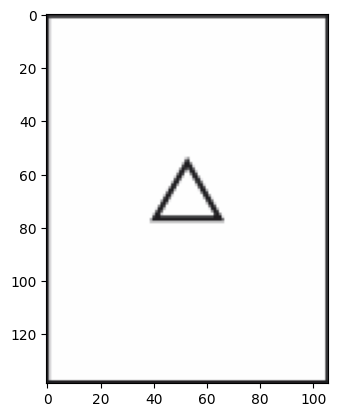

In [14]:
plt.imshow(page.jeonggan_list[0].img)

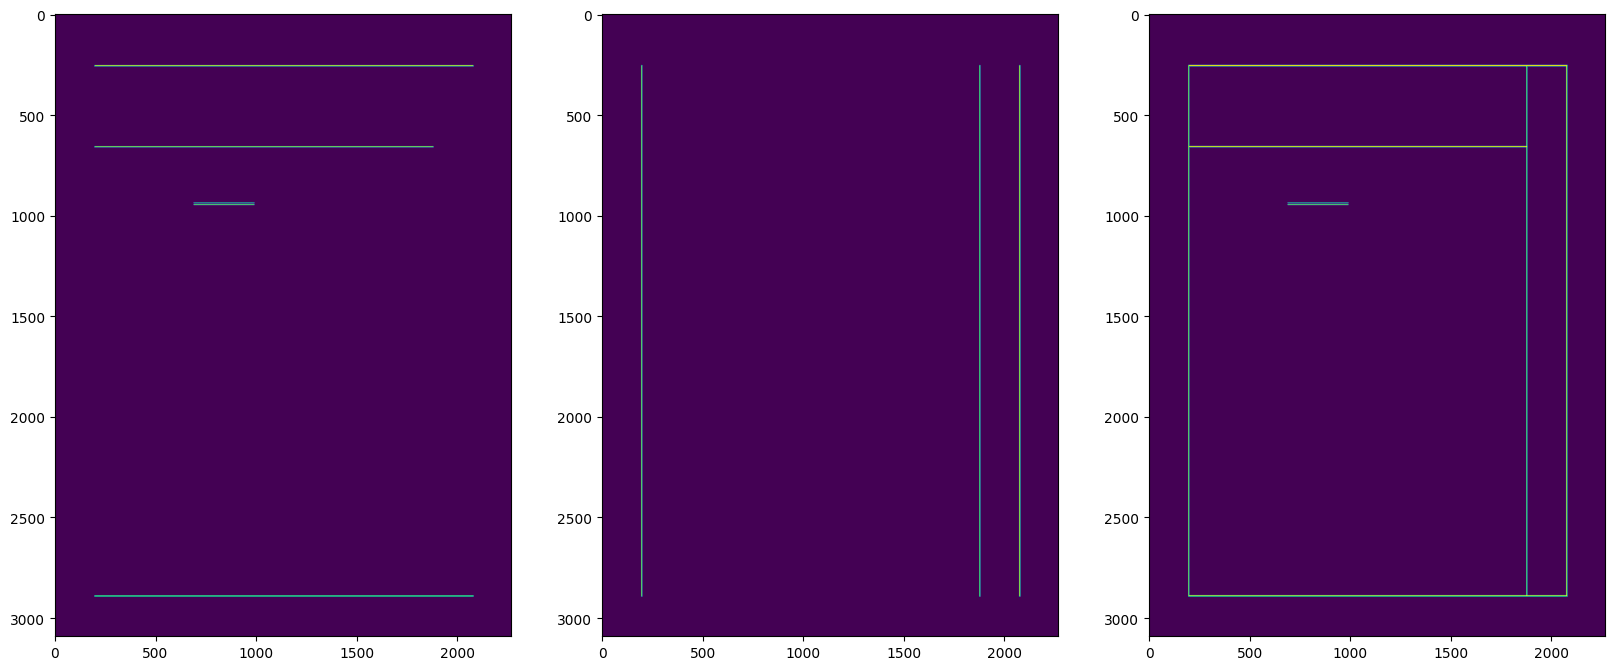

In [24]:
image = page.img
self = JeongganboReader()

img_bin = self._process_img(image)
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.thick_kernel_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.thick_kernel_v)
img_bin_final = img_bin_h + img_bin_v 

img_bin_h_alt = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.thick_kernel_h_alt)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img_bin_h_alt)
plt.subplot(1,3,2)
plt.imshow(img_bin_v)
plt.subplot(1,3,3)
plt.imshow(img_bin_final+img_bin_h_alt)
# boxes, _ = self._get_thick_lines(img_bin)
# boxes = self._detect_title_box(boxes)


# print(f"{len(boxes)} Title box detected at {image_path}")
# box = boxes[0]
# out = image[box[1]:box[1]+box[3], box[0]:box[0]+box[2]]


In [5]:
img_bin_h[:, 300].max(), img_bin_h_alt[:, 300].max()

(255, 255)

In [6]:
print(np.where(img_bin_h[:, 300]))

print(np.where(img_bin_h_alt[:, 300]))

(array([ 213,  214,  215,  216,  217,  452,  453,  454,  455,  456,  457,
       1171, 1172, 1173, 1174, 1175, 1650, 1651, 1652, 1653, 1654, 2129,
       2130, 2131, 2132, 2133, 2847, 2848, 2849, 2850, 2851]),)
(array([ 214,  215,  216,  217,  218,  453,  454,  455,  456,  457,  458,
       1172, 1173, 1174, 1175, 1176, 1651, 1652, 1653, 1654, 1655, 2130,
       2131, 2132, 2133, 2134, 2848, 2849, 2850, 2851, 2852]),)


In [ ]:


# img_bin_final = cv2.dilate(img_bin_final + img_bin_h_alt, self.final_kernel, iterations=1)
img_bin_final = cv2.dilate(img_bin_final, self.final_kernel, iterations=1)

_, _, boxes, _ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=4, ltype=cv2.CV_32S)



plt.figure(figsize=(20,20))
plt.imshow(img_bin_final)
for box in boxes[1:]:
    x, y, w, h, area = box
    if area < 1000:
        continue
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)

In [ ]:
box

In [ ]:
plt.imshow(image)

In [ ]:
plt.imshow(out)

In [ ]:
[[gak.org_x, gak.org_y, gak.w, gak.h] for gak in page.gaks]

In [ ]:
page.thick_boxes[4:5]

In [ ]:
page[0].img.shape

In [ ]:
[[gak.org_x, gak.org_y, gak.w, gak.h] for gak in page.gaks]

No jeonggan box detected at pngs/daegeum_pg-188.png


TypeError: Image data of dtype object cannot be converted to float

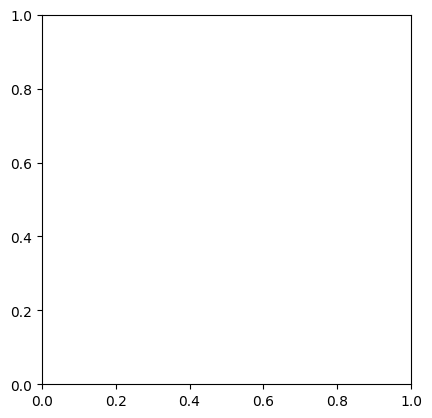

In [17]:
# image_path = 'haegeum_example.png'
# image_path = 'haegeum_pg-042.png'
# image_path = 'haegeum_pg-150.png'
# image_path = 'haegeum_pg-107.png'
image_path = 'pngs/daegeum_pg-188.png'

reader = JeongganboReader()
image = reader.detect_title_box_from_img_path(image_path)

plt.imshow(image)

In [44]:
image_fn = 'pngs/piri_pg-059.png'
reader = JeongganboReader()

reader(image_fn)

Page with 188 jeonggan

In [ ]:
page.img

In [ ]:
jeonggan_boxes

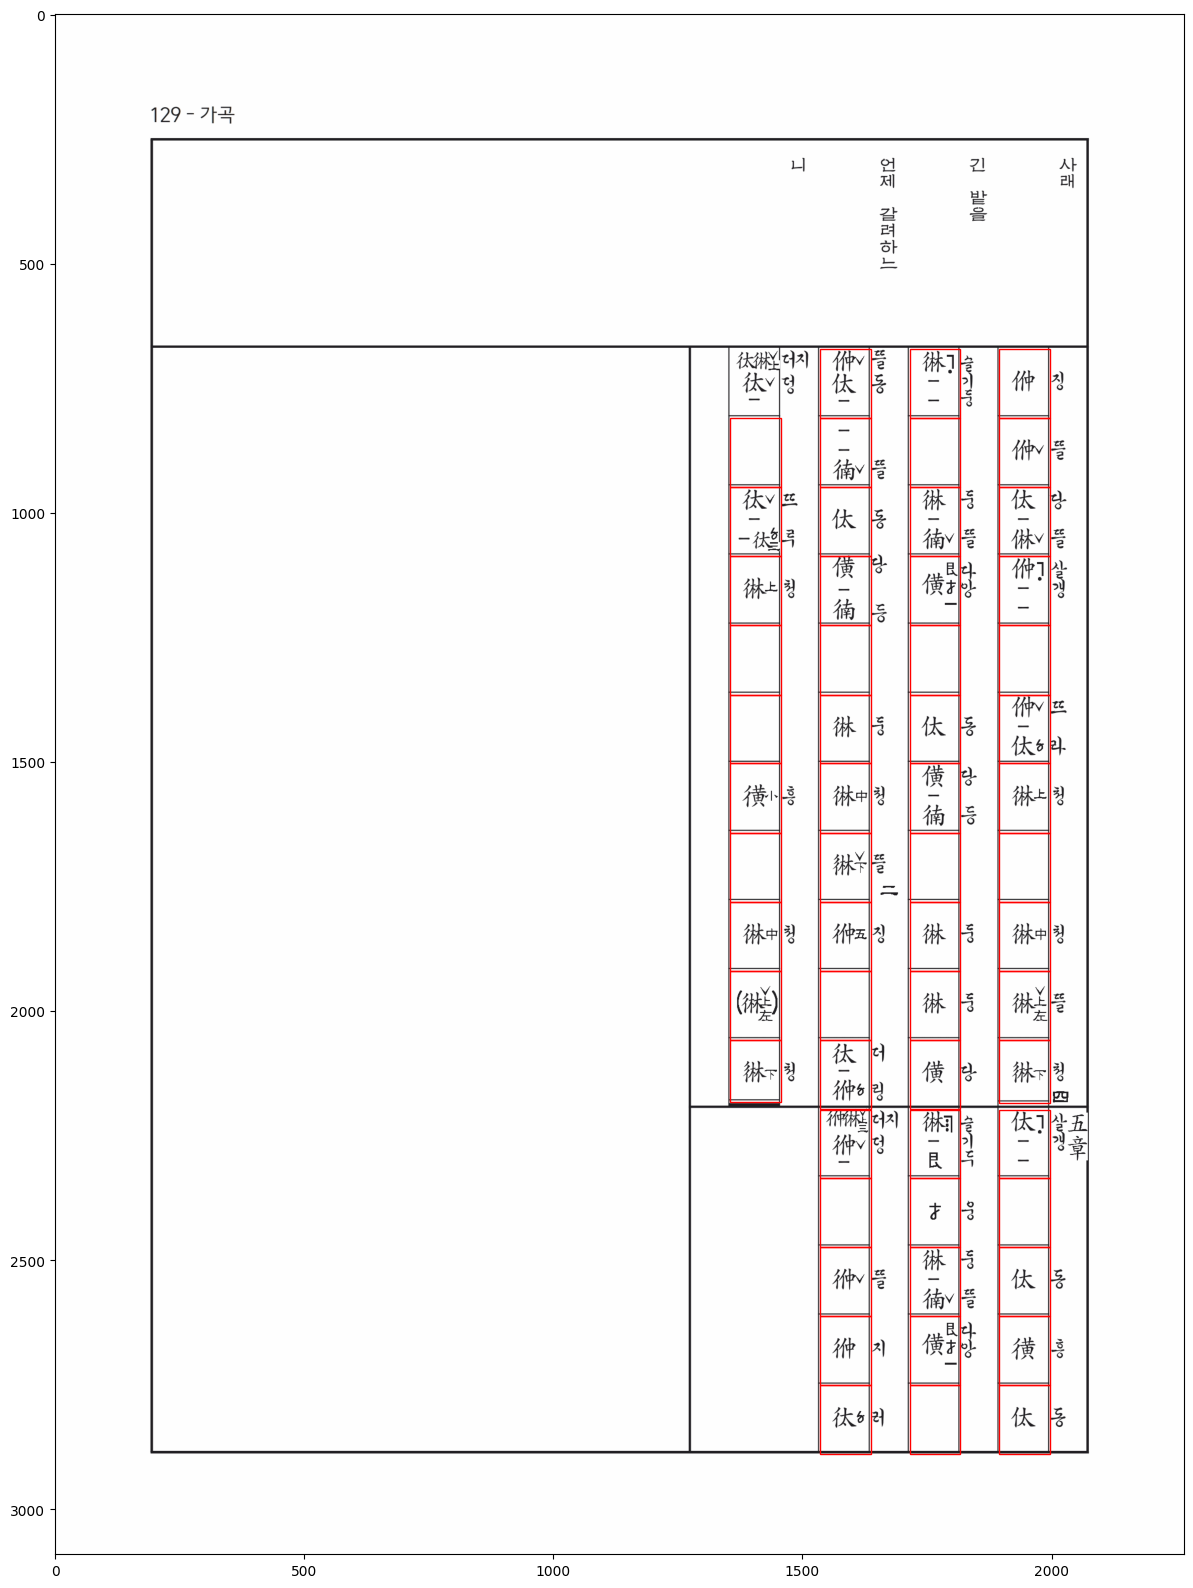

In [23]:
from data_utils import JG_MAX_AREA, JG_MIN_AREA, JG_MIN_WIDTH, JG_MAX_WIDTH, JG_MIN_HEIGHT, JG_MAX_HEIGHT
from pathlib import Path
# image = 'pngs/gayageum_pg-031.png'
# image = 'haegeum_pg-107.png'
# image = 'piri_pg-058.png'
image = 'pngs/haegeum_pg-119.png'
image = 'jeongganbo-png/pngs/geomungo_pg-127.png'


self = JeongganboReader()
# reader = JeongganboReader()
if isinstance(image, str):
  image = cv2.imread(image)
elif isinstance(image, Path):
  image = cv2.imread(str(image))
img_bin = self._process_img(image)


img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.kernel_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, self.kernel_v)
img_bin_v, thin_h_contours = self._repair_v_lines(img_bin_v, img_bin_h)

img_bin_final = img_bin_h + img_bin_v
img_bin_final = cv2.dilate(img_bin_final, self.final_kernel, iterations=1)
some_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))
img_closed = cv2.morphologyEx(img_bin_final, cv2.MORPH_CLOSE, some_kernel)

_, _, boxes, _ = cv2.connectedComponentsWithStats(~img_closed, connectivity=4, ltype=cv2.CV_32S)

# is_large_enough = boxes[:,-1] > JG_MIN_AREA
# is_small_enough = boxes[:,-1] < JG_MAX_AREA
# boxes = boxes[is_large_enough & is_small_enough]

is_wide_enough = boxes[:,2] > JG_MIN_WIDTH
is_narrow_enough = boxes[:,2] < JG_MAX_WIDTH
is_tall_enough = boxes[:,3] > JG_MIN_HEIGHT
is_short_enough = boxes[:,3] < JG_MAX_HEIGHT * 2

jeonggan_boxes = boxes[is_wide_enough & is_narrow_enough & is_tall_enough & is_short_enough]

# jeonggan_boxes = self._get_boxes(img_bin)
thick_boxes, h_contours = self._get_thick_lines(img_bin)
title_box = self._detect_title_box(img_bin, jeonggan_boxes, thick_boxes)

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(image)

jeonggan_boxes[:,0] -= 4
jeonggan_boxes[:,1] -= 4
jeonggan_boxes[:,2] += 4
jeonggan_boxes[:,3] += 4

jeonggan_boxes = self.filter_blank_jeonggan_after_double_line(jeonggan_boxes, thin_h_contours, image)

for box in jeonggan_boxes:
    x, y, w, h, area = box
    rect = patches.Rectangle((x+3, y+4), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# for box in thick_boxes:
# for box in title_box:
#     x, y, w, h, area = box
#     rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='none')
#     ax.add_patch(rect)
# h_contours, _ = cv2.findContours(img_bin_h, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# h_contours = np.asarray([cv2.boundingRect(c) for c in h_contours])
# h_contours = np.asarray(sorted(h_contours.tolist(), key=lambda x: (x[0], x[1]) ))

# for box in h_contours:
#     x, y, w, h = box
#     rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(rect)


In [60]:
h_contours, _ = cv2.findContours(img_bin_h, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
h_contours = np.asarray([cv2.boundingRect(c) for c in h_contours])
h_contours = np.asarray(sorted(h_contours.tolist(), key=lambda x: (x[0], x[1]) ))

In [68]:
h_contours

array([[ 206,  247, 1884,    6],
       [ 206,  802, 1884,    6],
       [ 206, 2466, 1884,    6],
       [ 206, 2883, 1884,    5],
       [ 286,  942,  105,    3],
       [ 286, 1081,  105,    3],
       [ 286, 1219,  105,    4],
       [ 286, 1358,  105,    3],
       [ 286, 1497,  105,    3],
       [ 286, 1635,  108,    4],
       [ 286, 1774,  105,    3],
       [ 286, 1913,  105,    3],
       [ 286, 2052,  105,    3],
       [ 286, 2190,  105,    3],
       [ 286, 2329,  105,    3],
       [ 466,  942,  105,    3],
       [ 466, 1081,  105,    3],
       [ 466, 1219,  105,    4],
       [ 466, 1358,  105,    3],
       [ 466, 1497,  105,    3],
       [ 466, 1635,  105,    4],
       [ 466, 1774,  105,    3],
       [ 466, 1913,  108,    3],
       [ 466, 2052,  105,    3],
       [ 466, 2190,  105,    3],
       [ 466, 2329,  105,    3],
       [ 646, 2190,  105,    3],
       [ 646, 2329,  105,    3],
       [ 826,  942,  105,    3],
       [ 826, 1081,  105,    3],
       [ 8

In [95]:
diff = np.diff(h_contours, axis=0, prepend=[[0,0,0,0]])
condition = (diff[:,0] == 0) * (diff[:,1] < 10)
filtered_contours = h_contours[condition]
filtered_contours

array([[ 826, 2190,  105,    3],
       [1366, 1913,  109,    3]])

In [105]:
box = filtered_contours[0]
box_index = np.nonzero((jeonggan_boxes[:,:2] - box[:2] == 0).all(axis=1))[0]
box_index = box_index[0]
jeonggan_box = jeonggan_boxes[box_index]
jeonggan_box_img = image[jeonggan_box[1]:jeonggan_box[1]+jeonggan_box[3], jeonggan_box[0]:jeonggan_box[0]+jeonggan_box[2]]


In [111]:
(jeonggan_box_img[2:, 2:] < 10 ).sum()

0

In [82]:
# h_contours.sort(axis=1)

contours, _ = cv2.findContours(img_bin_h, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
h_contours = [cv2.boundingRect(contour) for contour in contours]
h_contours = np.asarray(h_contours)

h_contours = h_contours[h_contours.argsort(axis=0)[:,1]]
h_contours

array([[ 192,  248, 1885,    6],
       [ 192,  664, 1885,    6],
       [ 812,  804,  105,    3],
       [1892,  804,  105,    3],
       [1712,  804,  105,    3],
       [1532,  804,  105,    3],
       [ 632,  804,  105,    3],
       [1172,  804,  105,    3],
       [ 992,  804,  105,    3],
       [1352,  804,  105,    3],
       [1892,  943,  105,    3],
       [1532,  943,  105,    3],
       [1352,  943,  105,    3],
       [1712,  943,  105,    3],
       [ 992,  943,  105,    3],
       [ 812,  943,  105,    3],
       [ 632,  943,  105,    3],
       [1172,  943,  105,    3],
       [ 812, 1081,  105,    3],
       [ 992, 1081,  105,    3],
       [1172, 1081,  105,    3],
       [1352, 1081,  105,    3],
       [1532, 1081,  105,    3],
       [1712, 1081,  105,    3],
       [1892, 1081,  105,    3],
       [ 632, 1081,  105,    3],
       [1532, 1220,  105,    3],
       [1892, 1220,  105,    3],
       [1712, 1220,  105,    3],
       [1352, 1220,  105,    3],
       [ 9

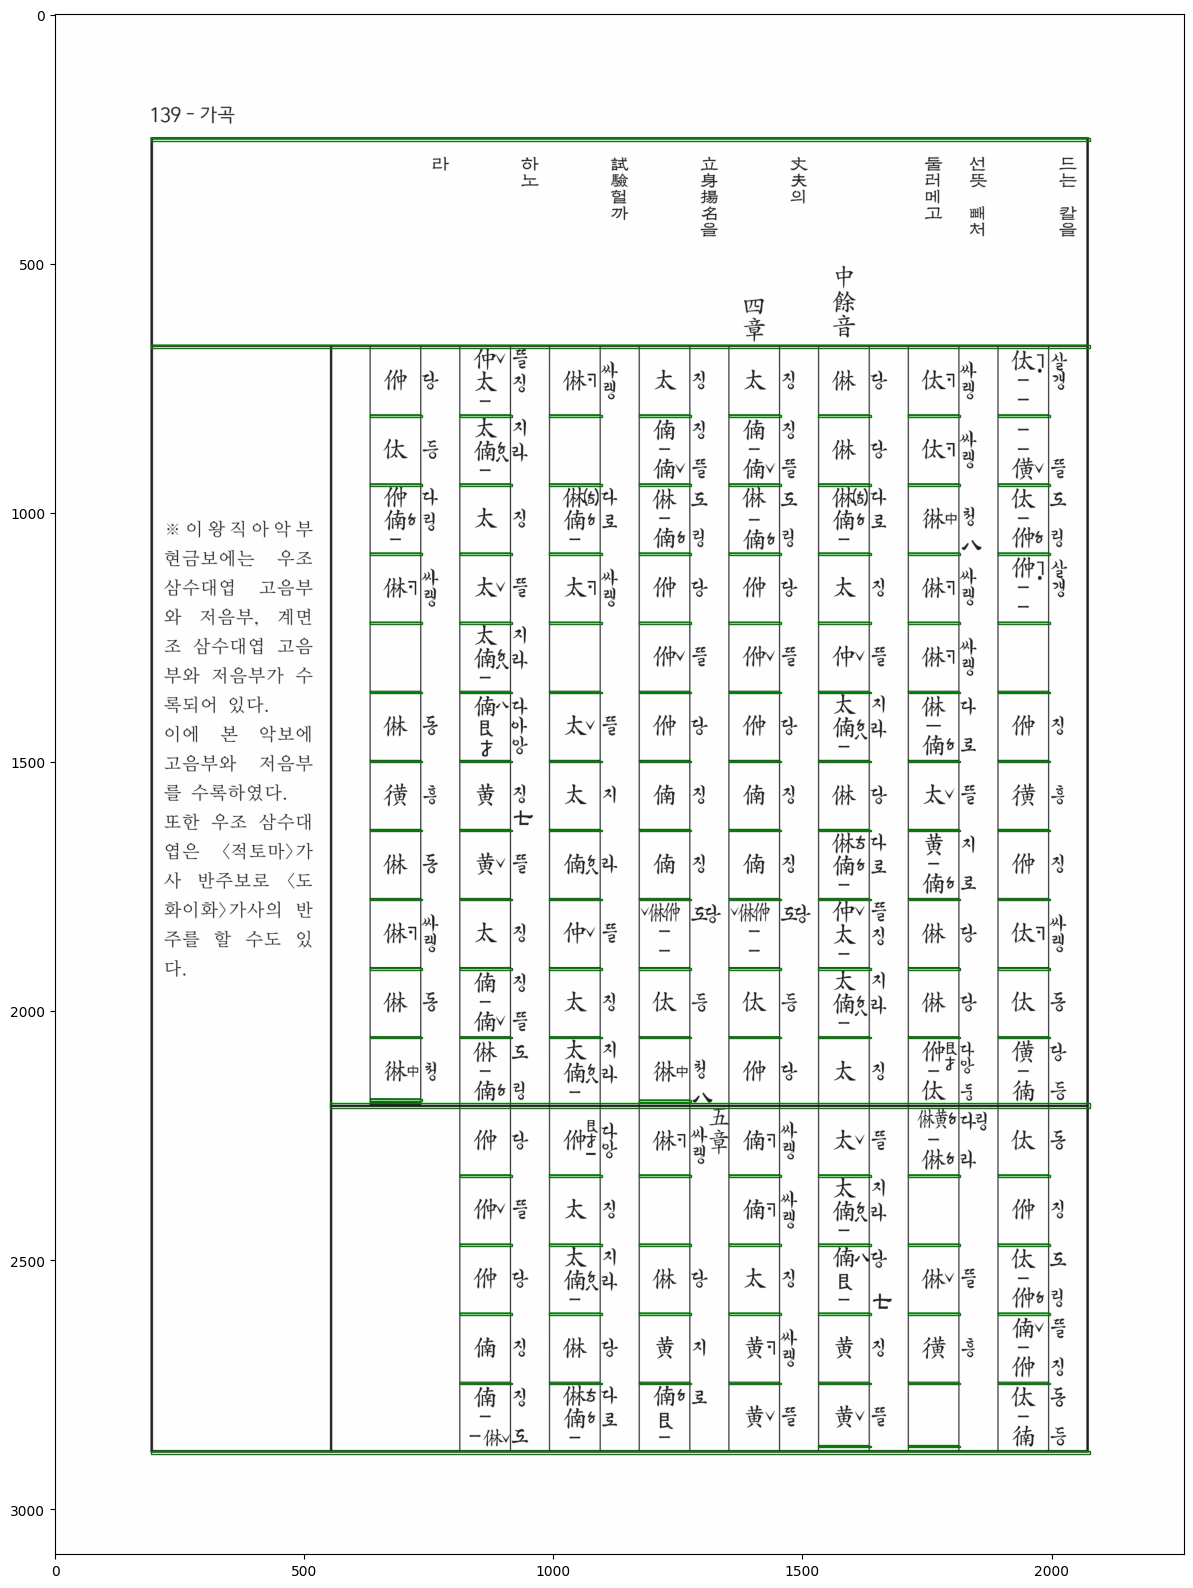

In [78]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(image)


contours, _ = cv2.findContours(img_bin_h, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
h_contours = [cv2.boundingRect(contour) for contour in contours]
h_contours = np.asarray(h_contours)
for box in h_contours:
    x, y, w, h = box
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

array([[ 192, 2883, 1885,    6],
       [1712, 2873,  105,    3],
       [1532, 2873,  105,    3],
       [1892, 2746,  105,    3],
       [1712, 2746,  105,    3],
       [1532, 2746,  105,    3],
       [1352, 2746,  105,    3],
       [1172, 2746,  105,    3],
       [ 992, 2746,  105,    3],
       [ 812, 2746,  105,    3],
       [1892, 2607,  105,    3],
       [1712, 2607,  105,    3],
       [1532, 2607,  105,    3],
       [1352, 2607,  105,    3],
       [1172, 2607,  105,    3],
       [ 992, 2607,  105,    3],
       [ 812, 2607,  105,    3],
       [1892, 2468,  105,    3],
       [1712, 2468,  105,    3],
       [1532, 2468,  105,    3],
       [1352, 2468,  105,    3],
       [1172, 2468,  105,    3],
       [ 992, 2468,  105,    3],
       [ 812, 2468,  105,    3],
       [1892, 2330,  105,    3],
       [1712, 2330,  105,    3],
       [1532, 2330,  105,    3],
       [1352, 2330,  105,    3],
       [1172, 2330,  105,    3],
       [ 992, 2330,  105,    3],
       [ 8

In [9]:
title_box

array([[   212,    493,    179,   2393, 414070]], dtype=int32)

In [ ]:
# draw every jeonggan

figure = plt.figure(figsize=(20,20))
for i, jg in enumerate(jeonggan_boxes):
  plt.subplot(10, 20, i+1)
  x, y, w, h, area = jg
  plt.imshow(image[y:y+h, x:x+w])

In [41]:
from data_utils import Page, Jeonggan, MIN_X_GAP, MIN_Y_GAP

def _get_unique_position(values:np.ndarray, min_gap:int):
  cleaned_list = [values[0]]
  ommited_list = {}
  for i in range(1, len(values)):
    if values[i] - cleaned_list[-1] > min_gap:
      cleaned_list.append(values[i])
    else:
      ommited_list[values[i]] = cleaned_list[-1]
  cleaned_list = sorted(list(set(cleaned_list)))
  mapping_dict = {cleaned_list[i]: cleaned_list[i] for i in range(len(cleaned_list))}
  mapping_dict.update(ommited_list)
  return cleaned_list, mapping_dict

img = image

jeonggan_list = [Jeonggan(img, x, y, w, h) for x, y, w, h in jeonggan_boxes[:,:-1]]

x_values = np.unique(jeonggan_boxes[:,0])
x_cleaned_list, x_map_dict = _get_unique_position(x_values, MIN_X_GAP)

y_values = np.unique(jeonggan_boxes[:,1])
y_cleaned_list, y_map_dict = _get_unique_position(y_values, MIN_Y_GAP)

x_cleaned_list, y_cleaned_list
# Page._update_jeonggan_beat(jeonggan_list)
# self.jeonggan_list = [Jeonggan(img, x, y, w, h) for x, y, w, h in self.jeonggan_boxes[:,:-1]]
# self._update_jeonggan_position(self.jeonggan_list)
# self.jeonggan_list = self._sort_jeonggan_by_position(self.jeonggan_list)
# self.gaks, self.new_gak_start_y_pos = self._detect_gak(self.jeonggan_list)


([290, 470, 650, 830, 1010, 1190, 1370, 1550, 1730, 1910],
 [493,
  612,
  732,
  851,
  971,
  1091,
  1212,
  1330,
  1450,
  1569,
  1691,
  1809,
  1929,
  2049,
  2170,
  2288,
  2408,
  2528,
  2648,
  2767])

## Repair h_line

In [ ]:
plt.imshow(img_closed)

## Repair v line

In [ ]:

from collections import Counter

contours, _ = cv2.findContours(img_bin_v, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
v_contours = np.asarray([cv2.boundingRect(c) for c in contours])


v_contour_counter = Counter(v_contours[:,1])
most_common_y_pos = v_contour_counter.most_common(1)[0][0]

filtered_contours = v_contours[v_contours[:,1] == most_common_y_pos]
most_common_len = Counter(filtered_contours[:,3]).most_common(1)[0][0]

broken_contours = filtered_contours[filtered_contours[:,3] < most_common_len]

for contour in broken_contours:
    x, y, w, h = contour
    img_bin_v[y:y+most_common_len, x:x+w] = 255

most_common_end_y = Counter(v_contours[:,1] + v_contours[:,3]).most_common(1)[0][0]
filtered_contours = v_contours[ abs(v_contours[:,1] + v_contours[:,3]  - most_common_end_y) < 5 ]

broken_contours = filtered_contours[filtered_contours[:,3] < most_common_len]
for contour in broken_contours:
    x, y, w, h = contour
    img_bin_v[y+h-most_common_len:y+h, x:x+w] = 255

too_short_contours = v_contours[v_contours[:,3] < JG_MAX_HEIGHT]
for contour in too_short_contours:
    x, y, w, h = contour
    img_bin_v[y:y+h, x:x+w] = 0

In [ ]:
v_contours

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img_bin_v)

In [ ]:
plt.imshow(img_bin_h)

In [ ]:

# plot image and boxes
# boxes: np.ndarray of [x, y, w, h, area]

# image_path = 'haegeum_pg-107.png'
# image_path = 'haegeum_pg-236.png'
image_path = 'pngs/piri_pg-024.png'


reader = JeongganboReader()
page = reader(image_path)

if isinstance(page, tuple):
    page = page[1]

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(page.img)

for box in page.jeonggan_boxes:
    x, y, w, h, area = box
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


# Experiment with multiple page Parsing

In [ ]:
from pathlib import Path

png_dir = Path('pngs/')
# png_fns = sorted(list(png_dir.glob('*.png')))

# instrument = 'haegeum'
instrument = 'piri'
png_fns = sorted(list(png_dir.glob(f'{instrument}_pg-*.png')))


reader = JeongganboReader()
pieces = reader.parse_multiple_pages(png_fns[19:50])

In [ ]:
pieces[0].jeonggans

In [ ]:
pieces[0]

In [ ]:
len(pieces)
len(pieces[0].gaks), len(pieces[0].jeonggans)

In [ ]:
pieces[0].gaks

In [ ]:
piece = pieces[0]

len(piece.gaks), len(piece.jeonggans)

In [ ]:
piece = pieces[0]

for i, page in enumerate(piece.pages):
  for j, gak in enumerate(page.gaks):
    print(i, j, gak)

In [ ]:
len([gak for gak in piece.gaks if not gak.is_jangdan])

# New Section

In [ ]:
# Jeonggan at (998, 1328) with size (99, 122)
# 278 459 99 115


In [ ]:
len(boxes)

In [ ]:
# Jeonggan at (998, 1328) with size (99, 122)
# 278 459 99 115


In [ ]:
reader = JeongganboReader()
image, (boxes, h_contours, v_contours) = reader(image_path)

# h_contours: List of cv2.boundingRect

# plot image and h_contours
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(image)

for box in boxes[4:5]:
    x, y, w, h, area = box
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    

In [ ]:
h_contours

In [ ]:
len(h_contours)

In [ ]:
page.new_gak_start_y_pos

In [ ]:
# Jeonggan at (998, 1328) with size (99, 122)
# 278 459 99 115


In [ ]:
import matplotlib.pyplot as plt
image = cv2.imread(image_path)

plt.imshow(image[459:459+115, 278:278+99, :])

In [ ]:
[x.h for x in page.jeonggan_list]

In [ ]:
page.gak

In [ ]:
import cv2
import numpy as np
from data_utils import *

# read image
image_path = 'haegeum_example.png'
image = cv2.imread(image_path)

# convert to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
img_bin = 255 - img_bin

line_min_length = 30
line_min_thickness = 2

kernel_h = np.ones((line_min_thickness, line_min_length), np.uint8)
kernel_v = np.ones((line_min_length, line_min_thickness), np.uint8)

img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel_v)

img_bin_final = img_bin_h + img_bin_v

final_kernel = np.ones((2, 2), np.uint8)
img_bin_final = cv2.dilate(img_bin_final, final_kernel, iterations=1)

_, labels, stats, _ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=4, ltype=cv2.CV_32S)




In [ ]:
JG_MIN_AREA = 8000
JG_MAX_AREA = 20000
JG_MIN_WIDTH = 92
JG_MAX_WIDTH = 102



In [ ]:
is_large_enough = stats[:,-1] > 8000
is_small_enough = stats[:,-1] < 20000

jeonggan_cells = stats[is_large_enough & is_small_enough]
min_wdith, max_width, min_height, max_height = jeonggan_cells[:,2].min(), jeonggan_cells[:,2].max(), jeonggan_cells[:,3].min(), jeonggan_cells[:,3].max()
min_wdith, max_width, min_height, max_height

In [ ]:
jeonggan_cells

In [ ]:
jeonggan_x_positions = np.unique(jeonggan_cells[:, 0])
jeonggan_y_positions = np.unique(jeonggan_cells[:, 1])

jeonggan_x_positions, jeonggan_y_positions

x_interval = np.diff(jeonggan_x_positions)
y_interval = np.diff(jeonggan_y_positions)
x_interval, y_interval

In [ ]:
jeonggan_boxes = jeonggan_cells

jeonggan_list = [{'x': x, 'y': y, 'width': w, 'height': h} for x, y, w, h in jeonggan_boxes[:,:-1]]

jeonggan_list.sort(key=lambda x: (-x['x'], x['y'])) 

In [ ]:
jeonggan_list

In [ ]:
for x,y,w,h in jeonggan_boxes:
  print(x,y,w,h)

In [ ]:
jeonggan_boxes.sort(axis=0, descending=True)
jeonggan_boxes

In [ ]:
# def get_clean_y_positions(y_positions:np.ndarray):


In [ ]:
jeonggan_y_positions

In [ ]:
other_cells = stats[~(is_large_enough & is_small_enough)]
MIN_SIZE = 1000
MAX_SIZE = 100000
other_cells = other_cells[other_cells[:,-1] > MIN_SIZE]
other_cells = other_cells[other_cells[:,-1] < MAX_SIZE]

len(other_cells)

In [ ]:
other_cells

In [ ]:
import matplotlib.pyplot as plt


# plt.figure(figsize=(30, 10))
# for i, (x, y, w, h, area) in enumerate(other_cells[:20], start=1):
#   plt.subplot(1, 20, i)
#   plt.imshow(image[y:y+h, x:x+w])
